In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout

from tensorflow.keras import datasets, layers, models

In [5]:
from keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols
print ("Number of training samples: %d"%train_features.shape[0])
print ("Number of test samples: %d"%test_features.shape[0])
print ("Image rows: %d"%train_features.shape[1])
print ("Image columns: %d"%train_features.shape[2])
print ("Number of classes: %d"%num_classes)

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


In [6]:
train_features = train_features.reshape(train_features.shape[0], 28, 28, 1)
test_features = test_features.reshape(test_features.shape[0], 28, 28, 1)
shape = (28, 28, 1)

train_features = train_features.astype('float32')
test_features = test_features.astype('float32')

train_features /= 255
test_features /= 255
print('x_train shape:', train_features.shape)
print('Number of images in x_train', train_features.shape[0])
print('Number of images in x_test', test_features.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.05))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=train_features,y=train_labels, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 26s 431us/step - loss: 0.1794 - accuracy: 0.9464s -
Epoch 2/20
60000/60000 [==============================] - 26s 436us/step - loss: 0.0661 - accuracy: 0.9796
Epoch 3/20
60000/60000 [==============================] - 26s 431us/step - loss: 0.0410 - accuracy: 0.9872
Epoch 4/20
60000/60000 [==============================] - 27s 445us/step - loss: 0.0260 - accuracy: 0.9919
Epoch 5/20
60000/60000 [==============================] - 25s 425us/step - loss: 0.0222 - accuracy: 0.9927
Epoch 6/20
60000/60000 [==============================] - 26s 437us/step - loss: 0.0160 - accuracy: 0.9945
Epoch 7/20
60000/60000 [==============================] - 25s 420us/step - loss: 0.0144 - accuracy: 0.9951
Epoch 8/20
60000/60000 [==============================] - 25s 417us/step - loss: 0.0115 - accuracy: 0.9960s - loss: 0.011
Epoch 9/20
60000/60000 [==============================] - 26s 436us/step - loss: 0.0101 - accuracy: 0.9968
Epoch 10/20
60000/6

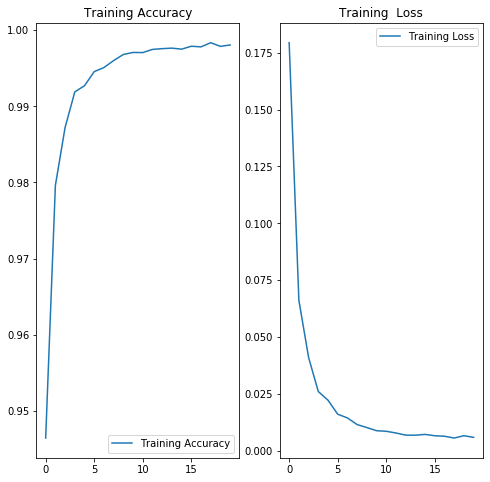

In [10]:
import numpy as np
import matplotlib.pyplot as plt
acc = history.history['accuracy']

loss=history.history['loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training  Loss')
plt.show()

In [11]:
model.evaluate(test_features, test_labels, batch_size = 500)

10000/10000 [==============================] - 0s 44us/step


[0.11044041390996426, 0.9843000173568726]

In [14]:
predictions = model.predict(test_features)
print(predictions[0])
np.argmax(predictions[0])

[1.13868334e-20 1.28523384e-18 8.90069633e-17 2.35495298e-13
 1.69165615e-21 4.24996654e-22 1.38476397e-25 1.00000000e+00
 3.58610635e-19 1.06192520e-11]


7

In [87]:
def plot_image(i, predictions_array, true_label, img):
    
      predictions_array, true_label, img = predictions_array, true_label[i], img[i]
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])
      img = img.reshape(28, 28)
      plt.imshow(img)

      predicted_label = np.argmax(predictions_array)
      if predicted_label == true_label:
        color = 'blue'
      else:
        color = 'red'

      plt.xlabel("{} {:2.0f}% ({})".format(train_labels[predicted_label],
                                100*np.max(predictions_array),
                                train_labels[true_label]),
                                color=color)

    
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

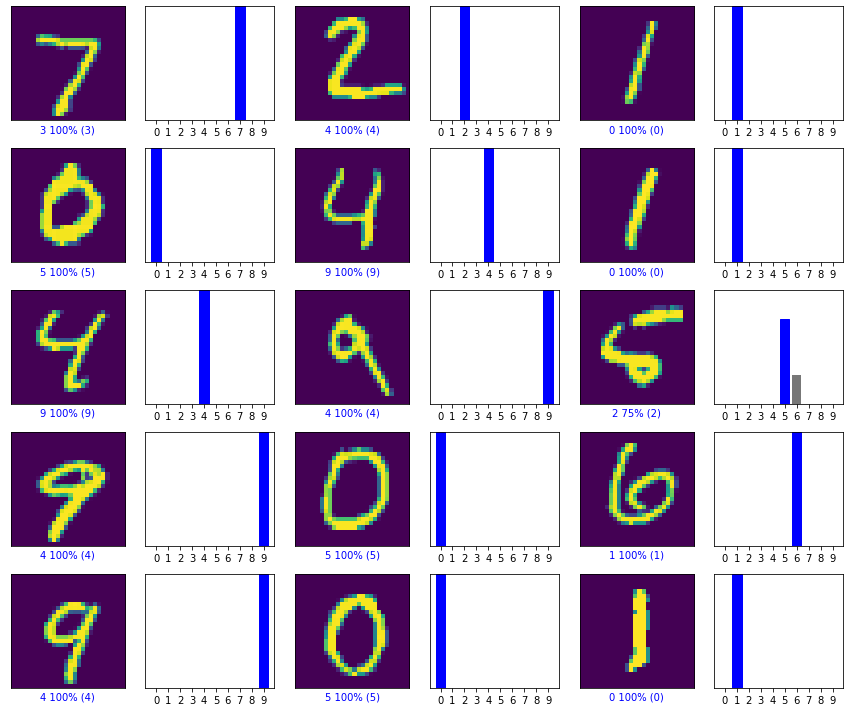

In [88]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_features)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()